# Módulo 1 - Introducción a las historias periodísticas con datos
## Vuelos nacionales


<div class="naked-img">
    <img src="../files/el_uniandino.png" width="500">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

### Índice técnico
* Variables, ciclos, condicionales, tipos de datos
* Librerías
    * Pandas
    * Matplotlib


# Tipo de historia: Cambios en el tiempo

* ¿Cómo ha evolucionado una tendencia?

* ¿Qué significa una tendencia?

* ¿Qué produce una tendencia?

<div class="naked-img">
    <img src="../files/data_time_abortions.jpg" width="500">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

<div class="naked-img">
    <img src="../files/data_time_abortions_right_1.jpg" width="500">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

<div class="naked-img">
    <img src="../files/data_time_abortions_right_2.jpg" width="500">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

<div class="naked-img">
    <img src="../files/global_warm_local.png" width="500">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

<div class="naked-img">
    <img src="../files/global_warm_wider_1.png" width="350">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

<div class="naked-img">
    <img src="../files/global_warm_wider_2.png" width="350">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

<div class="naked-img">
    <img src="../files/nonsense_corr.jpg" width="800">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

Todo el [p*to tiempo](https://www.tylervigen.com/spurious-correlations)

# ¿Qué/cómo buscar?

# ¿Qué queremos saber?

Cómo ha evolucionado el tráfico nacional a lo largo del tiempo



## ¿Dónde buscar?



### Fuentes

- Google
- Gobierno (registraduria, aerocivil, ministerios, etc.)
- Datos abiertos (datos.gov.co, datosabiertos.bogota.gov.co, etc)

Ejemplo: 
1. [Busqueda en google](https://www.google.com/search?safe=off&sxsrf=ALeKk00mMMvCmQ7OE2XcniYQJd_WxxmXYg%3A1610405167444&ei=L9X8X63LGs3l5NoPmYuh4Ag&q=vuelos+nacionales+datos+aerocivil&oq=vuelos+nacionales+datos+aerocivil&gs_lcp=CgZwc3ktYWIQAzoECAAQRzoECCMQJ1CSKFiMLGDGLGgAcAJ4AIABc4gBggSSAQMyLjOYAQCgAQGqAQdnd3Mtd2l6yAEIwAEB&sclient=psy-ab&ved=0ahUKEwjtnszf-pTuAhXNMlkFHZlFCIwQ4dUDCA0&uact=5)

# Data Wrangling
## Una vez hay datos, hay que limpiarlos

Usualmente hay 2 pasos:

1. Pasar los datos a un formato legible (o cómodamente legible) por máquinas
2. Limpiar los datos 






# Formato de datos 

- JSON
- XML
- Excel
- JSON
- CSV (y sus variantes...)

Hay demasiados formatos, pueden buscar los detalles en google. 

En nuestro caso, haremos el ejercicio de pasar de excel a CSV. 

# CSV
## Comma separated values 

```
Year,Make,Model,Length
1997,Ford,E350,2.35
2000,Mercury,Cougar,2.38
```

En general, el separador puede ser cualquier caracter, por ejemplo:
    
```
Year;Make;Model;Length
1997;Ford;E350;2,35
2000;Mercury;Cougar;2,38
```

Usualmente, se guardan los archivos con extension ```.csv```. Por ejemplo: ```carros.csv```

# Ejemplo

1. Fuente: [Página aerocivil](https://www.aerocivil.gov.co/atencion/estadisticas-de-las-actividades-aeronauticas/estadisticas-operacionales)
2. Datos: [Tráfico aeropuerto 2004-2019](https://www.aerocivil.gov.co/atencion/estadisticas-de-las-actividades-aeronauticas/Aeropuertos/TRAFICO%20AEROPUERTOS%202004-2019.xlsx)

**Objetivo:** pasar de ```.xlsx``` (excel) a ```.csv```

# Limpiar datos

Hemos limpiado los datos por uds. Están en `/data/vuelosNacionales/vuelosNacionales.csv`


In [1]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('../data/vuelosNacionales/vuelosNacionales.csv')
data

,NOMBRE AEROPUERTO,CIUDAD,DEPARTAMENTO,Pasajeros Salidos - 2019,Pasajeros Llegados - 2019,Carga y Correo Salida (Kg) - 2019,Carga y Correo Llegados (kg) - 2019,Número Vuelos Salidos - 2019,Número Vuelos Llegados - 2019,Pasajeros Salidos - 2018,...,Carga y Correo Salida (Kg) - 2005,Carga y Correo Llegados (kg) - 2005,Número Vuelos Salidos - 2005,Número Vuelos Llegados - 2005,Pasajeros Salidos - 2004,Pasajeros Llegados - 2004,Carga y Correo Salida (Kg) - 2004,Carga y Correo Llegados (kg) - 2004,Número Vuelos Salidos - 2004,Número Vuelos Llegados - 2004
0,EL ENCANTO,EL ENCANTO,AMAZONAS,62,55,805,2.281,31.000,31.000,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LA CHORRERA - VIRGILIO BARCO VARGAS,LA CHORRERA,AMAZONAS,788,859,85.783,105.966,136.000,135.000,1.167,...,27.801,60.326,190.000,192.000,433,540,2.117,4.081,53.0,54.0
2,LA PEDRERA,LA PEDRERA,AMAZONAS,2.517,2.570,339.960,336.699,382.000,383.000,2.731,...,111.693,97.117,156.000,173.000,385,487,141.136,94.403,101.0,99.0
3,LETICIA-ALFREDO VASQUEZ COBO,LETICIA,AMAZONAS,166.039,167.011,9.465.876,7.424.085,1.788,1.791,134.304,...,8.494.881,6.507.999,1.127,1.071,26.861,28.076,7.715.581,6.094.633,755.0,749.0
4,TARAPACA,LETICIA,AMAZONAS,758,701,26.654,29.652,122.000,123.000,1.164,...,6.587,9.118,47.000,55.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,SANTA BARBARA,CUMARAL,META,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16,0,0,0,12.0,0.0
793,YATAROS DE MELUA,PUERTO LOPEZ,META,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,0,0,0,1.0,0.0
794,LA CABA?A - META,SAN CARLOS DE GUAROA,META,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,0,0,1.0,1.0
795,AEROSPORT.C.A.,FLANDES,TOLIMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,0,0,1.0,1.0


In [2]:
# variables
a = 4
print(a*2)
a = 3
print(a*2)

8
6


In [3]:
import io

# pandas dataframes
stringData = '''Year,Make,Model,Length
                1997,Ford,E350,2.35
                2000,Mercury,Cougar,2.38'''
df = pd.read_csv(io.StringIO(stringData))
df

,Year,Make,Model,Length
0,1997,Ford,E350,2.35
1,2000,Mercury,Cougar,2.38


In [4]:
df['Year'] = df['Year'] - 3
df

,Year,Make,Model,Length
0,1994,Ford,E350,2.35
1,1997,Mercury,Cougar,2.38


# De vuelta al ejemplo


In [5]:
data.head()

,NOMBRE AEROPUERTO,CIUDAD,DEPARTAMENTO,Pasajeros Salidos - 2019,Pasajeros Llegados - 2019,Carga y Correo Salida (Kg) - 2019,Carga y Correo Llegados (kg) - 2019,Número Vuelos Salidos - 2019,Número Vuelos Llegados - 2019,Pasajeros Salidos - 2018,...,Carga y Correo Salida (Kg) - 2005,Carga y Correo Llegados (kg) - 2005,Número Vuelos Salidos - 2005,Número Vuelos Llegados - 2005,Pasajeros Salidos - 2004,Pasajeros Llegados - 2004,Carga y Correo Salida (Kg) - 2004,Carga y Correo Llegados (kg) - 2004,Número Vuelos Salidos - 2004,Número Vuelos Llegados - 2004
0,EL ENCANTO,EL ENCANTO,AMAZONAS,62,55,805,2.281,31.000,31.000,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LA CHORRERA - VIRGILIO BARCO VARGAS,LA CHORRERA,AMAZONAS,788,859,85.783,105.966,136.000,135.000,1.167,...,27.801,60.326,190.000,192.000,433,540,2.117,4.081,53.0,54.0
2,LA PEDRERA,LA PEDRERA,AMAZONAS,2.517,2.570,339.960,336.699,382.000,383.000,2.731,...,111.693,97.117,156.000,173.000,385,487,141.136,94.403,101.0,99.0
3,LETICIA-ALFREDO VASQUEZ COBO,LETICIA,AMAZONAS,166.039,167.011,9.465.876,7.424.085,1.788,1.791,134.304,...,8.494.881,6.507.999,1.127,1.071,26.861,28.076,7.715.581,6.094.633,755.0,749.0
4,TARAPACA,LETICIA,AMAZONAS,758,701,26.654,29.652,122.000,123.000,1.164,...,6.587,9.118,47.000,55.000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(797, 99)

### Quitemos los ```.``` de los números

```166.039 -> 166039
9.465.876 -> 9465876```

In [7]:
columnas = data.columns
print(columnas[:3])

# pasemoslo a lista
columnas = list(columnas)
print(columnas[:3])

columnasConNumeros = columnas[3:]
print(columnasConNumeros)

# para cada columna, quite los .


Index(['NOMBRE AEROPUERTO', 'CIUDAD', 'DEPARTAMENTO'], dtype='object')
['NOMBRE AEROPUERTO', 'CIUDAD', 'DEPARTAMENTO']
['Pasajeros Salidos - 2019', 'Pasajeros Llegados - 2019', 'Carga y Correo Salida (Kg) - 2019', 'Carga y Correo Llegados (kg) - 2019', 'Número Vuelos Salidos - 2019', 'Número Vuelos Llegados - 2019', 'Pasajeros Salidos - 2018', 'Pasajeros Llegados - 2018', 'Carga y Correo Salida (Kg) - 2018', 'Carga y Correo Llegados (kg) - 2018', 'Número Vuelos Salidos - 2018', 'Número Vuelos Llegados - 2018', 'Pasajeros Salidos - 2017', 'Pasajeros Llegados - 2017', 'Carga y Correo Salida (Kg) - 2017', 'Carga y Correo Llegados (kg) - 2017', 'Número Vuelos Salidos - 2017', 'Número Vuelos Llegados - 2017', 'Pasajeros Salidos - 2016', 'Pasajeros Llegados - 2016', 'Carga y Correo Salida (Kg) - 2016', 'Carga y Correo Llegados (kg) - 2016', 'Número Vuelos Salidos - 2016', 'Número Vuelos Llegados - 2016', 'Pasajeros Salidos - 2015', 'Pasajeros Llegados - 2015', 'Carga y Correo Salida (Kg) - 2

### ¿Cómo iterar?

In [8]:
for columna in columnasConNumeros:
    
    # limpiar columna
    print(columna)
    limpiarColumna(data, columna)

Pasajeros Salidos - 2019


NameError: name 'limpiarColumna' is not defined

## Funciones

In [9]:
def limpiarColumna(dataFrame, nombreDeColumna):
    
    columna = dataFrame[nombreDeColumna]
    columnaLimpia = columna.str.replace('.','')
    
    dataFrame[nombreDeColumna] = columnaLimpia
    

# Invoquemos la función


In [10]:
primeraColumna = columnasConNumeros[0]
print(data[primeraColumna])

limpiarColumna(data, primeraColumna)
print(data[primeraColumna])

0           62
1          788
2        2.517
3      166.039
4          758
        ...   
792        NaN
793        NaN
794        NaN
795        NaN
796        NaN
Name: Pasajeros Salidos - 2019, Length: 797, dtype: object
0          62
1         788
2        2517
3      166039
4         758
        ...  
792       NaN
793       NaN
794       NaN
795       NaN
796       NaN
Name: Pasajeros Salidos - 2019, Length: 797, dtype: object


# De vuelta al ejemplo

In [11]:
for columna in columnasConNumeros:
    
    # limpiar columna
    print(columna)
    limpiarColumna(data, columna)

Pasajeros Salidos - 2019
Pasajeros Llegados - 2019
Carga y Correo Salida (Kg) - 2019
Carga y Correo Llegados (kg) - 2019
Número Vuelos Salidos - 2019


AttributeError: Can only use .str accessor with string values!

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NOMBRE AEROPUERTO                    797 non-null    object 
 1   CIUDAD                               797 non-null    object 
 2   DEPARTAMENTO                         797 non-null    object 
 3   Pasajeros Salidos - 2019             312 non-null    object 
 4   Pasajeros Llegados - 2019            312 non-null    object 
 5   Carga y Correo Salida (Kg) - 2019    312 non-null    object 
 6   Carga y Correo Llegados (kg) - 2019  312 non-null    object 
 7   Número Vuelos Salidos - 2019         312 non-null    float64
 8   Número Vuelos Llegados - 2019        312 non-null    float64
 9   Pasajeros Salidos - 2018             325 non-null    object 
 10  Pasajeros Llegados - 2018            325 non-null    object 
 11  Carga y Correo Salida (Kg) - 201

## Condicionales

A veces, nos interesa ejecutar un pedazo de código sólamente si se cumple una condición.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NOMBRE AEROPUERTO                    797 non-null    object 
 1   CIUDAD                               797 non-null    object 
 2   DEPARTAMENTO                         797 non-null    object 
 3   Pasajeros Salidos - 2019             312 non-null    object 
 4   Pasajeros Llegados - 2019            312 non-null    object 
 5   Carga y Correo Salida (Kg) - 2019    312 non-null    object 
 6   Carga y Correo Llegados (kg) - 2019  312 non-null    object 
 7   Número Vuelos Salidos - 2019         312 non-null    float64
 8   Número Vuelos Llegados - 2019        312 non-null    float64
 9   Pasajeros Salidos - 2018             325 non-null    object 
 10  Pasajeros Llegados - 2018            325 non-null    object 
 11  Carga y Correo Salida (Kg) - 201

In [14]:
# float64 column
data['Número Vuelos Salidos - 2019']

0       31.000
1      136.000
2      382.000
3        1.788
4      122.000
        ...   
792        NaN
793        NaN
794        NaN
795        NaN
796        NaN
Name: Número Vuelos Salidos - 2019, Length: 797, dtype: float64

In [15]:
data['Número Vuelos Salidos - 2007'].dtypes == 'float'

True

In [16]:
def limpiarColumna(dataFrame, nombreDeColumna):
    
    columna = dataFrame[nombreDeColumna]
    
    # CONDICIONAL
    if data[nombreDeColumna].dtypes == 'float':
        columna = columna.astype(str)
        
    columnaLimpia = columna.str.replace('.','')        
    dataFrame[nombreDeColumna] = columnaLimpia

In [17]:
for columna in columnasConNumeros:
    
    # limpiar columna
    print(columna)
    limpiarColumna(data, columna)

Pasajeros Salidos - 2019
Pasajeros Llegados - 2019
Carga y Correo Salida (Kg) - 2019
Carga y Correo Llegados (kg) - 2019
Número Vuelos Salidos - 2019
Número Vuelos Llegados - 2019
Pasajeros Salidos - 2018
Pasajeros Llegados - 2018
Carga y Correo Salida (Kg) - 2018
Carga y Correo Llegados (kg) - 2018
Número Vuelos Salidos - 2018
Número Vuelos Llegados - 2018
Pasajeros Salidos - 2017
Pasajeros Llegados - 2017
Carga y Correo Salida (Kg) - 2017
Carga y Correo Llegados (kg) - 2017
Número Vuelos Salidos - 2017
Número Vuelos Llegados - 2017
Pasajeros Salidos - 2016
Pasajeros Llegados - 2016
Carga y Correo Salida (Kg) - 2016
Carga y Correo Llegados (kg) - 2016
Número Vuelos Salidos - 2016
Número Vuelos Llegados - 2016
Pasajeros Salidos - 2015
Pasajeros Llegados - 2015
Carga y Correo Salida (Kg) - 2015
Carga y Correo Llegados (kg) - 2015
Número Vuelos Salidos - 2015
Número Vuelos Llegados - 2015
Pasajeros Salidos - 2014
Pasajeros Llegados - 2014
Carga y Correo Salida (Kg) - 2014
Carga y Correo 

¿Quedó bien?

In [18]:
data

,NOMBRE AEROPUERTO,CIUDAD,DEPARTAMENTO,Pasajeros Salidos - 2019,Pasajeros Llegados - 2019,Carga y Correo Salida (Kg) - 2019,Carga y Correo Llegados (kg) - 2019,Número Vuelos Salidos - 2019,Número Vuelos Llegados - 2019,Pasajeros Salidos - 2018,...,Carga y Correo Salida (Kg) - 2005,Carga y Correo Llegados (kg) - 2005,Número Vuelos Salidos - 2005,Número Vuelos Llegados - 2005,Pasajeros Salidos - 2004,Pasajeros Llegados - 2004,Carga y Correo Salida (Kg) - 2004,Carga y Correo Llegados (kg) - 2004,Número Vuelos Salidos - 2004,Número Vuelos Llegados - 2004
0,EL ENCANTO,EL ENCANTO,AMAZONAS,62,55,805,2281,310,310,87,...,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,nan,nan
1,LA CHORRERA - VIRGILIO BARCO VARGAS,LA CHORRERA,AMAZONAS,788,859,85783,105966,1360,1350,1167,...,27801,60326,1900,1920,433,540,2117,4081,530,540
2,LA PEDRERA,LA PEDRERA,AMAZONAS,2517,2570,339960,336699,3820,3830,2731,...,111693,97117,1560,1730,385,487,141136,94403,1010,990
3,LETICIA-ALFREDO VASQUEZ COBO,LETICIA,AMAZONAS,166039,167011,9465876,7424085,1788,1791,134304,...,8494881,6507999,1127,1071,26861,28076,7715581,6094633,7550,7490
4,TARAPACA,LETICIA,AMAZONAS,758,701,26654,29652,1220,1230,1164,...,6587,9118,470,550,NaN,NaN,NaN,NaN,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,SANTA BARBARA,CUMARAL,META,NaN,NaN,NaN,NaN,nan,nan,NaN,...,NaN,NaN,nan,nan,16,0,0,0,120,00
793,YATAROS DE MELUA,PUERTO LOPEZ,META,NaN,NaN,NaN,NaN,nan,nan,NaN,...,NaN,NaN,nan,nan,2,0,0,0,10,00
794,LA CABA?A - META,SAN CARLOS DE GUAROA,META,NaN,NaN,NaN,NaN,nan,nan,NaN,...,NaN,NaN,nan,nan,2,2,0,0,10,10
795,AEROSPORT.C.A.,FLANDES,TOLIMA,NaN,NaN,NaN,NaN,nan,nan,NaN,...,NaN,NaN,nan,nan,2,2,0,0,10,10


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   NOMBRE AEROPUERTO                    797 non-null    object
 1   CIUDAD                               797 non-null    object
 2   DEPARTAMENTO                         797 non-null    object
 3   Pasajeros Salidos - 2019             312 non-null    object
 4   Pasajeros Llegados - 2019            312 non-null    object
 5   Carga y Correo Salida (Kg) - 2019    312 non-null    object
 6   Carga y Correo Llegados (kg) - 2019  312 non-null    object
 7   Número Vuelos Salidos - 2019         797 non-null    object
 8   Número Vuelos Llegados - 2019        797 non-null    object
 9   Pasajeros Salidos - 2018             325 non-null    object
 10  Pasajeros Llegados - 2018            325 non-null    object
 11  Carga y Correo Salida (Kg) - 2018    325 non-

# Tipos de datos

Hay varios tipos de datos en python (y cualquier lenguaje de programación):

- strings
- enteros (ints)
- flotantes (floats) - decimales
- booleanos (booleans/bools)

Tenemos que convertir la columna de ```str``` (que pandas interpreta como ```object```) a enteros (```int```).

In [20]:

def limpiarColumna(dataFrame, nombreDeColumna):
    
    columna = dataFrame[nombreDeColumna]
    if data[nombreDeColumna].dtypes == 'float':
        columna = columna.astype(str)
        
    columnaLimpia = columna.str.replace('.','')
    # cambiar a entero
    columnaComoNumero = columnaLimpia.astype(int)
    dataFrame[nombreDeColumna] = columnaComoNumero

Intentemos otra vez.

In [21]:
for columna in columnasConNumeros:
    
    # limpiar columna
    print(columna)
    limpiarColumna(data, columna)

Pasajeros Salidos - 2019


ValueError: cannot convert float NaN to integer

# Nans - not a number

- Dato no existe
- Operación matemática no es válida (division por 0)

Eliminemos los ```Nan```s

In [22]:
# Descomprimamos esto

datosLimpios = data[data[columnasConNumeros].isna().sum(axis=1)==0]


In [23]:
for columna in columnasConNumeros:
    
    # limpiar columna
    print(columna)
    limpiarColumna(datosLimpios, columna)

Pasajeros Salidos - 2019
Pasajeros Llegados - 2019
Carga y Correo Salida (Kg) - 2019
Carga y Correo Llegados (kg) - 2019
Número Vuelos Salidos - 2019
Número Vuelos Llegados - 2019
Pasajeros Salidos - 2018
Pasajeros Llegados - 2018
Carga y Correo Salida (Kg) - 2018
Carga y Correo Llegados (kg) - 2018
Número Vuelos Salidos - 2018
Número Vuelos Llegados - 2018
Pasajeros Salidos - 2017
Pasajeros Llegados - 2017
Carga y Correo Salida (Kg) - 2017
Carga y Correo Llegados (kg) - 2017
Número Vuelos Salidos - 2017
Número Vuelos Llegados - 2017
Pasajeros Salidos - 2016
Pasajeros Llegados - 2016
Carga y Correo Salida (Kg) - 2016
Carga y Correo Llegados (kg) - 2016
Número Vuelos Salidos - 2016
Número Vuelos Llegados - 2016
Pasajeros Salidos - 2015
Pasajeros Llegados - 2015
Carga y Correo Salida (Kg) - 2015
Carga y Correo Llegados (kg) - 2015
Número Vuelos Salidos - 2015
Número Vuelos Llegados - 2015
Pasajeros Salidos - 2014
Pasajeros Llegados - 2014
Carga y Correo Salida (Kg) - 2014
Carga y Correo 

<ipython-input-20-34a368bf79d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[nombreDeColumna] = columnaComoNumero


In [24]:
datosLimpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 311
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   NOMBRE AEROPUERTO                    158 non-null    object
 1   CIUDAD                               158 non-null    object
 2   DEPARTAMENTO                         158 non-null    object
 3   Pasajeros Salidos - 2019             158 non-null    int64 
 4   Pasajeros Llegados - 2019            158 non-null    int64 
 5   Carga y Correo Salida (Kg) - 2019    158 non-null    int64 
 6   Carga y Correo Llegados (kg) - 2019  158 non-null    int64 
 7   Número Vuelos Salidos - 2019         158 non-null    int64 
 8   Número Vuelos Llegados - 2019        158 non-null    int64 
 9   Pasajeros Salidos - 2018             158 non-null    int64 
 10  Pasajeros Llegados - 2018            158 non-null    int64 
 11  Carga y Correo Salida (Kg) - 2018    158 non-

# Visualización de datos

Por categoría (pasajeros salidos, pasajeros llegados, carga y correo entrante, ...)




# Matplotlib 

[Galeria](https://matplotlib.org/3.1.1/gallery/index.html)

- Histogramas
- Scatterplot 
- Barplot 
- Line plot (linechart)
- etc.

¿Cómo ha evolucionado el tráfico nacional a lo largo del tiempo?

Podemos mirar las distribuciones de pasajeros salidos del 2004 y el 2019 como una primera aproximación.

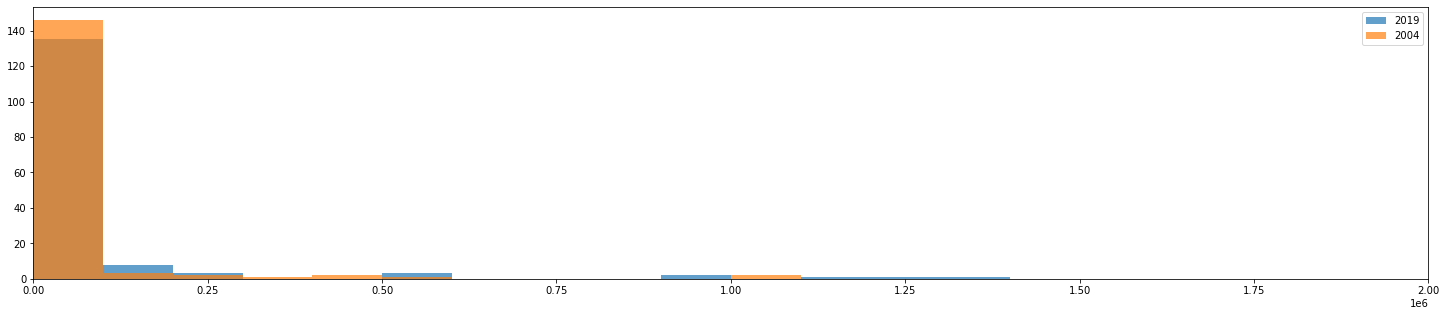

In [28]:
import matplotlib.pyplot as plt 

bins = [i*0.1e6 for i in range(120)]

fig = plt.figure(figsize=(25,5))

plt.hist(datosLimpios['Pasajeros Salidos - 2019'], bins=bins, label='2019', alpha=0.7)
plt.hist(datosLimpios['Pasajeros Salidos - 2004'], bins=bins, label='2004', alpha=0.7)
plt.xlim(0,2e6)
plt.legend()
plt.savefig('histogramas.png')
plt.savefig('histogramas.pdf')

Los histogramas no nos dejan ver la imágen completa. Podemos ver cómo ha evolucionado la suma de los pasajeros que salen. 

Text(0, 0.5, 'Número de pasajeros salidos')

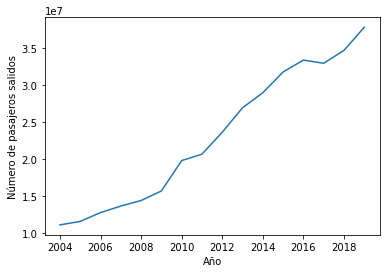

In [29]:
def estaEnCategoria(elemento):
    return 'Pasajeros Salidos' in elemento

columnasPasajerosSalidos = list(filter(estaEnCategoria,columnasConNumeros))
anios = [2019-i for i in range(16)]

plt.plot(anios,datosLimpios[columnasPasajerosSalidos].sum())
plt.xlabel('Año')
plt.ylabel('Número de pasajeros salidos')

Podemos ver las llegadas y salidas de los pasajeros:

Text(0, 0.5, 'Número de pasajeros')

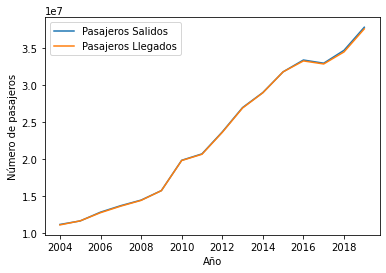

In [34]:
def plotCategoria(categoria):
    def estaEnCategoria(elemento):
        return categoria in elemento

    columnasPasajerosSalidos = list(filter(estaEnCategoria,columnasConNumeros))
    anios = [2019-i for i in range(16)]

    plt.plot(anios,datosLimpios[columnasPasajerosSalidos].sum(), label=categoria)
    
plotCategoria('Pasajeros Salidos')
plotCategoria('Pasajeros Llegados')
plt.legend()
plt.xlabel('Año')
plt.ylabel('Número de pasajeros')


Miremos **la diferencia** entre los pasajeros que han llegado y salido.

<BarContainer object of 16 artists>

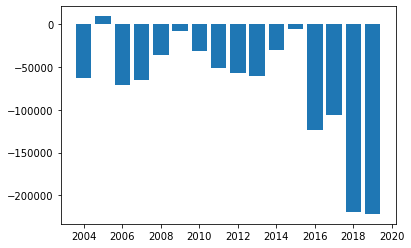

In [35]:
colsSalidos = list(filter(lambda x: 'Pasajeros Salidos' in x, columnasConNumeros))
colsLlegados = list(filter(lambda x: 'Pasajeros Llegados' in x, columnasConNumeros))
anios = [2019-i for i in range(16)]

diferencias = []

for i in range(len(colsSalidos)):
    dif = datosLimpios[colsLlegados[i]].sum() - datosLimpios[colsSalidos[i]].sum()
    diferencias.append(dif)
    
plt.bar(anios,diferencias)
    



Comparemos los datos limipios eliminando las filas con nans con el dataframe original remplazando los nans con 0

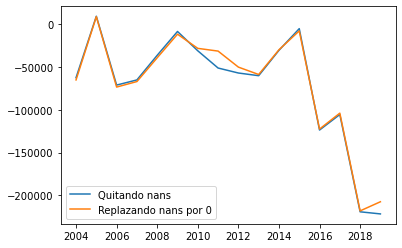

In [38]:
def limpiarColumna(dataFrame, nombreDeColumna):
    
    columna = dataFrame[nombreDeColumna]
    if data[nombreDeColumna].dtypes == 'float':
        columna = columna.astype(str)
        
    columnaLimpia = columna.str.replace('.','')
    # cambiar a entero
    columnaLimpia = columnaLimpia.fillna(0)
    columnaComoNumero = columnaLimpia.astype(int)
    dataFrame[nombreDeColumna] = columnaComoNumero

fillZero = data.fillna(0)
fillZero = fillZero.replace('nan',0)


for columna in columnasConNumeros:
    
    # limpiar columna
    limpiarColumna(fillZero, columna)


diferenciasFillZero = []

for i in range(len(colsSalidos)):
    dif = fillZero[colsLlegados[i]].sum() - fillZero[colsSalidos[i]].sum()
    diferenciasFillZero.append(dif)
    
plt.plot(anios,diferencias, label='Quitando nans')
plt.plot(anios,diferenciasFillZero, label='Replazando nans por 0')
plt.legend()

# Pequeño resumen del módulo

### Aprendimos...
* Variables, ciclos, condicionales, tipos de datos
* Librerias
    * Pandas
    * Matplotlib

### Aprendimos...
* Aprendan a pescar: busquen en internet que siempre hay respuestas
* Arranquen por Google para buscar datos 